In [1]:
import MDAnalysis as mda
from MDAnalysis.tests.datafiles import PDB_small, PDB_closed, PSF, DCD
from MDAnalysis.analysis.encore.clustering import ClusteringMethod as clm
from MDAnalysis.analysis.encore.dimensionality_reduction import DimensionalityReductionMethod as drm
from MDAnalysis.analysis import distances, encore, contacts, diffusionmap, align, rms
from pmda.rms import RMSF

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
traj_path = '/media/leandro/Volumen1TB1/Lean/SBG/Base_de_calcio/Estudio de la diversidad conformacional de sitios de unión a Calcio/MCU/'
u = mda.Universe(traj_path + '4nsc_A_0.15NA_30ns_gromacs/md.gro', traj_path + '4nsc_A_0.15NA_30ns_gromacs/md.xtc')

   atom_name  distances  index res_name  res_position
8        OD1  16.256150    8.0      ASP         231.0
13         O  11.945349   25.0      ASN         233.0
3         HA  13.869364   29.0      ASP         235.0
1          H  18.026787   39.0      GLU         237.0
   atom_name  distances  index res_name  res_position
9        OD2  18.666171    9.0      ASP         231.0
13         O  14.427489   25.0      ASN         233.0
3         HA  15.802844   29.0      ASP         235.0
1          H  20.164764   39.0      GLU         237.0
   atom_name  distances  index res_name  res_position
9        OD2  16.882534    9.0      ASP         231.0
13         O  13.401659   25.0      ASN         233.0
0          N  15.846347   26.0      ASP         235.0
1          H  19.503233   39.0      GLU         237.0
   atom_name  distances  index res_name  res_position
8        OD1  16.386206    8.0      ASP         231.0
13         O  11.922534   25.0      ASN         233.0
0          N  14.984159   26

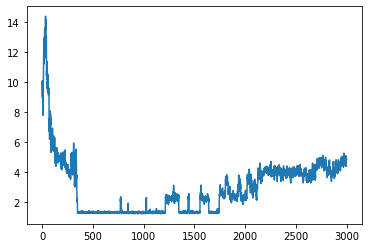

In [20]:
rmss=[]
for i in range(len(u.trajectory)):
    try:
        LID_ca = u.select_atoms('resid 56591', updating=True)
        NMP_ca = u.select_atoms('resid 231 233 235 237', updating=True)
        u.trajectory.next()
        n_LID = len(LID_ca)
        n_NMP = len(NMP_ca)
        # print('LID has {} atoms and NMP has {} atoms'.format(n_LID, n_NMP))
        dist_arr = distances.distance_array(LID_ca.positions, # reference
                                            NMP_ca.positions, # configuration
                                            box=u.dimensions)
        df = pd.DataFrame([NMP_ca.resnums,NMP_ca.resnames,NMP_ca.names,dist_arr[0]]).T
        df.columns=['res_position','res_name','atom_name','distances']
        rms=[]
        contact=pd.DataFrame()
        for j in [231, 233, 235, 237]:
            dfj = df[df['res_position']==j].reset_index()
            contact=contact.append(dfj.iloc[pd.to_numeric(dfj.loc[:,'distances']).idxmin(),:])
            rms =+ (min(df[df['res_position']==j]['distances']))**2
        rmss.append((rms/4)**(1/2))
        print(contact)
    except StopIteration:
        plt.plot(rmss)
        exit(2)

In [4]:
resid_list = u.select_atoms('resname CA', updating=True).resids
for ca_resid in resid_list[2:]:
    print(ca_resid)
    rmss=pd.DataFrame()
    for i in range(len(u.trajectory)):
        try:
            LID_ca = u.select_atoms('resid ' + str(ca_resid), updating=True)
            NMP_ca = u.select_atoms('protein', updating=True)
            u.trajectory.next()
            n_LID = len(LID_ca)
            n_NMP = len(NMP_ca)
            dist_arr = distances.distance_array(LID_ca.positions, # reference
                                                NMP_ca.positions, # configuration
                                                box=u.dimensions)
            df = pd.DataFrame([NMP_ca.resnums,NMP_ca.resnames,NMP_ca.names,dist_arr[0]]).T
            df.columns=['res_position','res_name','atom_name','distances']
            rmss=rmss.append(df.iloc[pd.to_numeric(df.loc[:,'distances']).idxmin(),:])
#             rmss.append(min(df['distances']))
        except StopIteration:
#             plt.plot(rmss)
#             plt.savefig('/home/lean/Documentos/Lean/SBG/Base_de_calcio/DiversidadConformacionalCBS/MCU/molecular dynamic/ca_distances/' + str(ca_resid))
            exit(2)
    rmss.to_csv('/home/lean/Documentos/Lean/SBG/Base_de_calcio/DiversidadConformacionalCBS/MCU/molecular dynamic/ca_distances/' + str(ca_resid) + '.csv')

56543
56544
56545
56546
56547
56548
56549
56550
56551
56552
56553
56554
56555
56556
56557
56558
56559
56560
56561
56562
56563
56564
56565
56566
56567
56568
56569
56570
56571
56572
56573
56574


KeyboardInterrupt: 

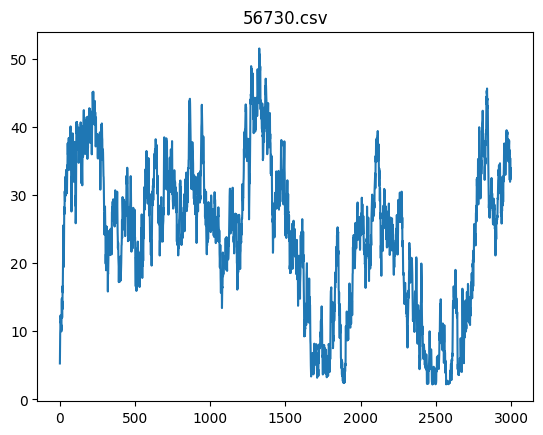

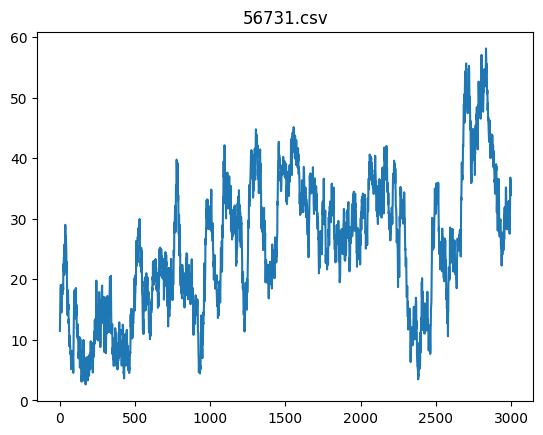

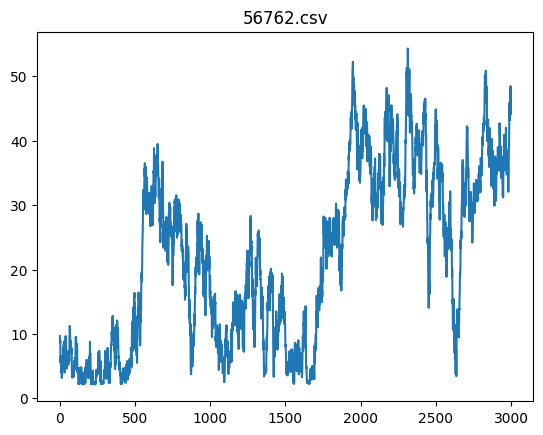

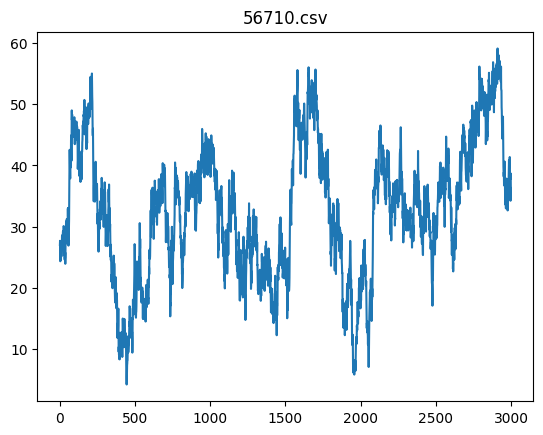

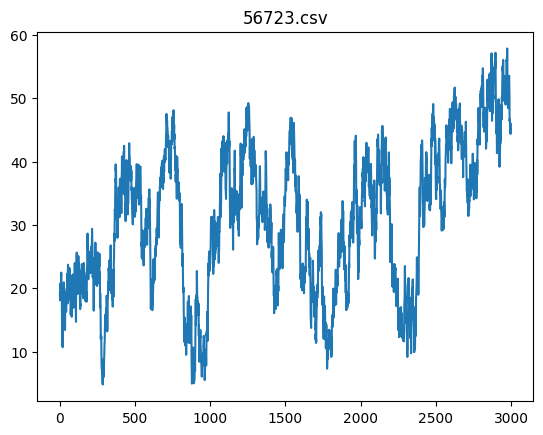

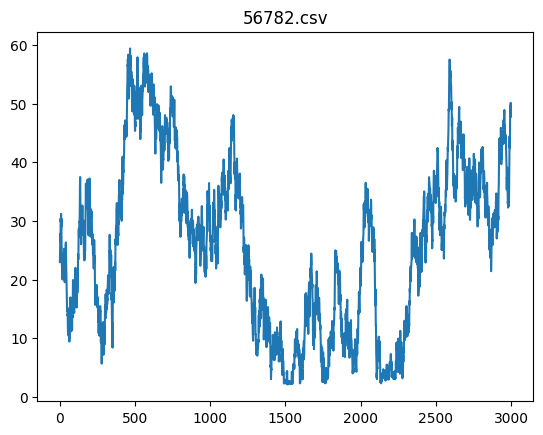

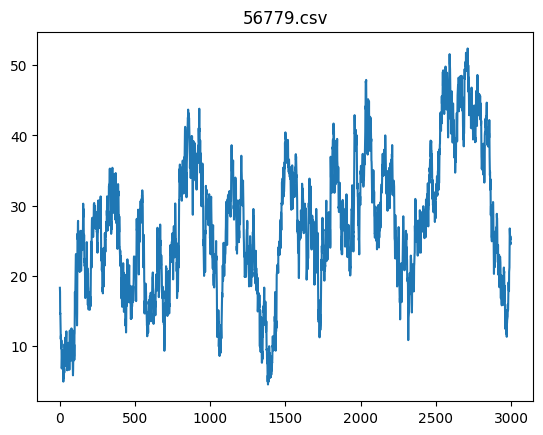

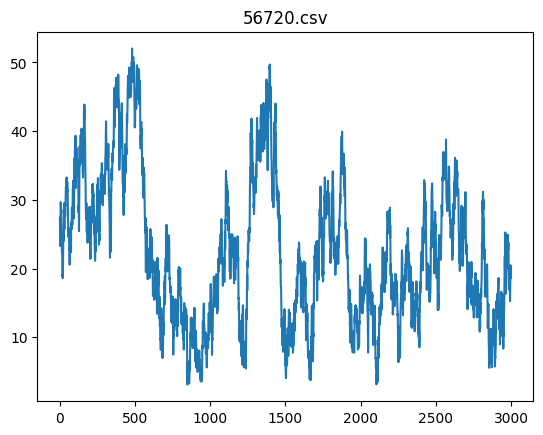

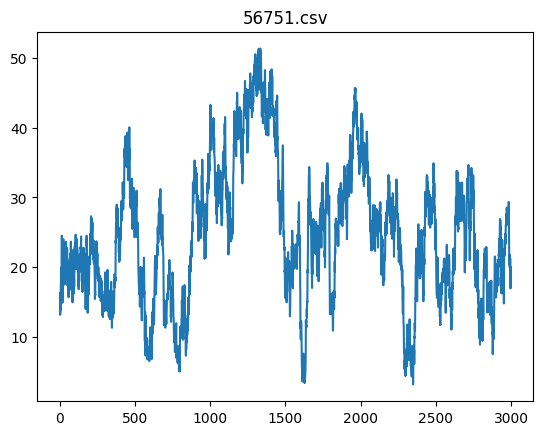

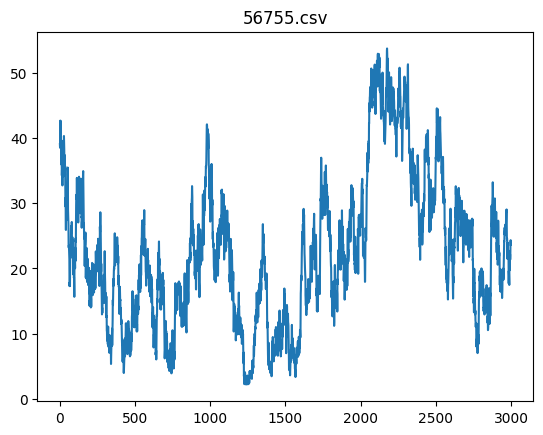

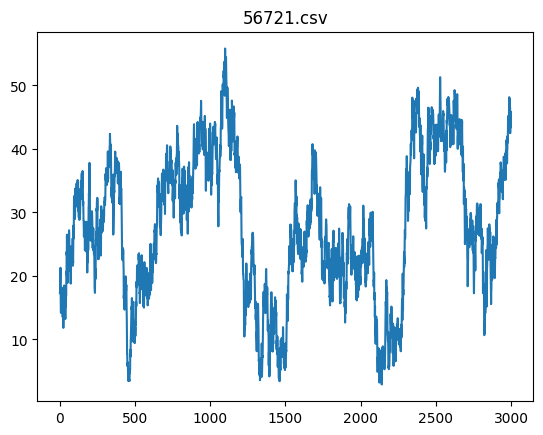

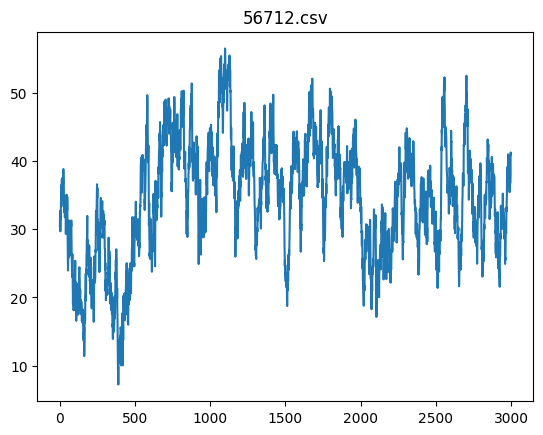

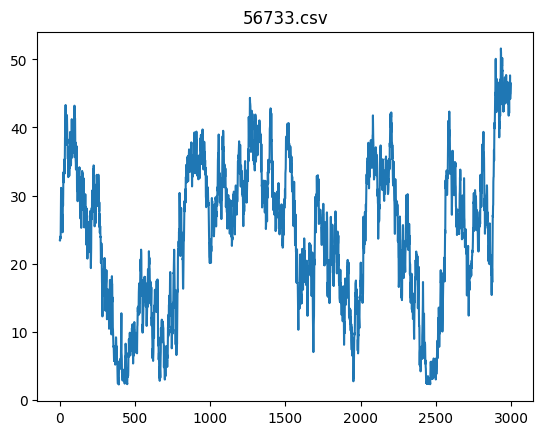

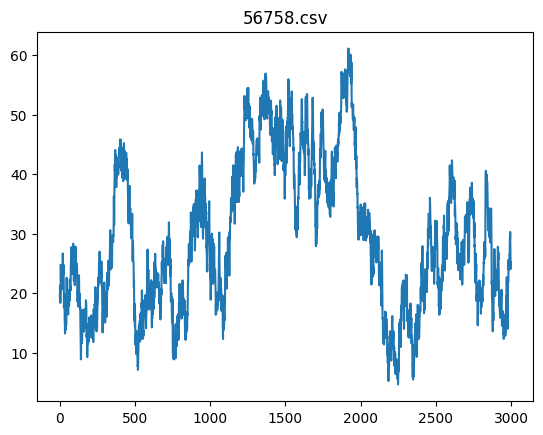

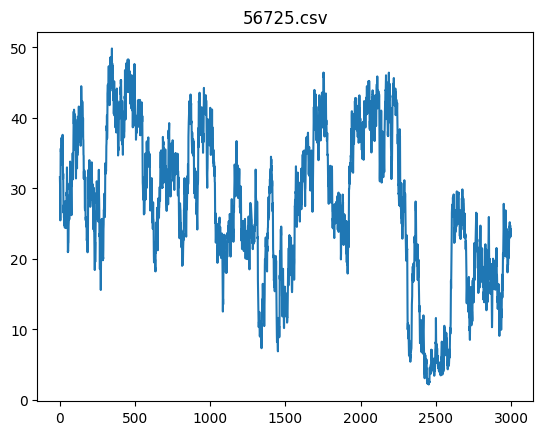

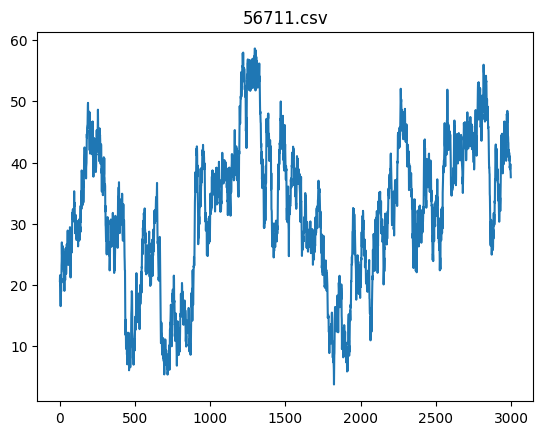

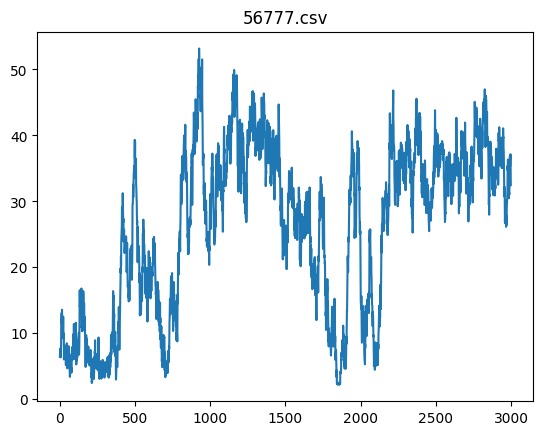

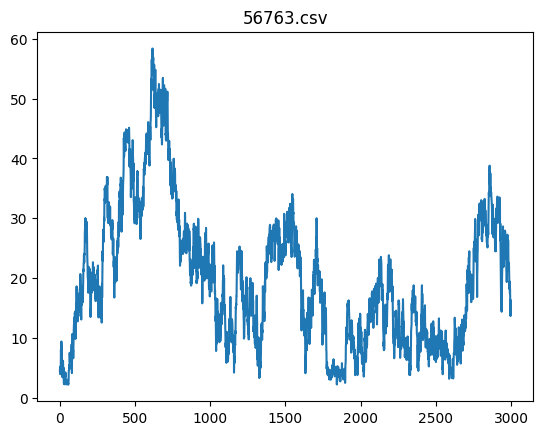

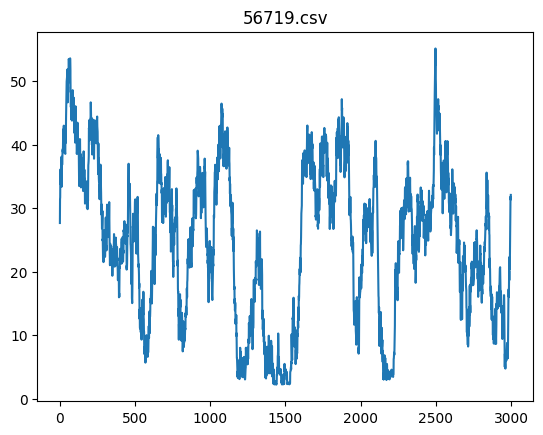

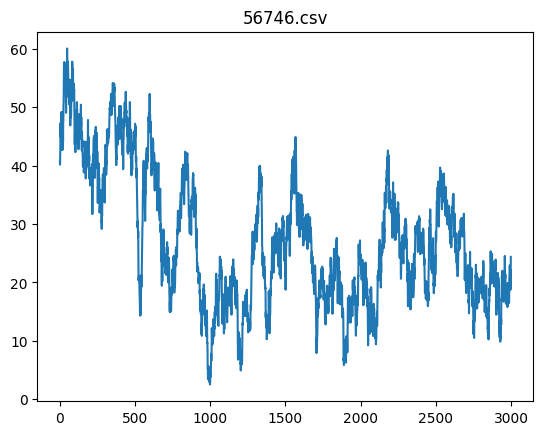

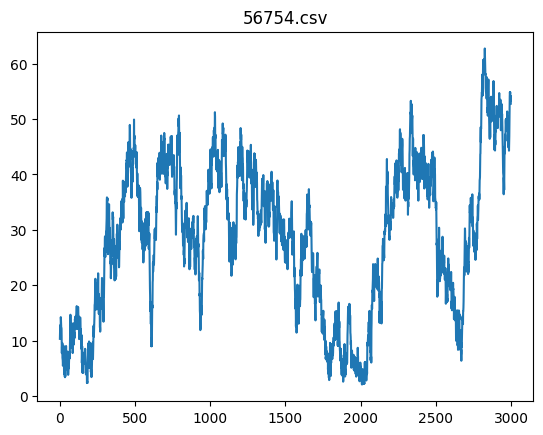

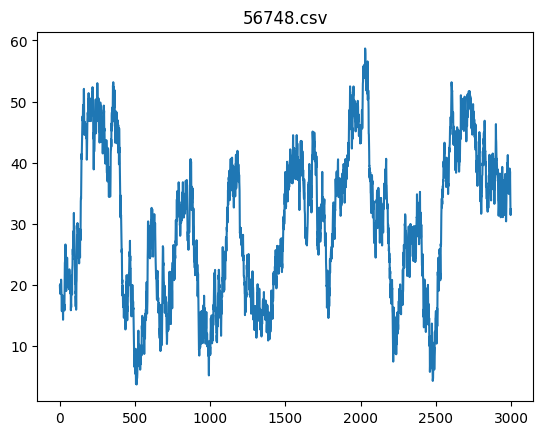

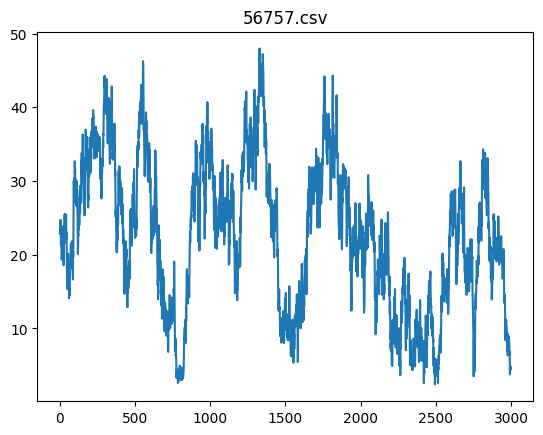

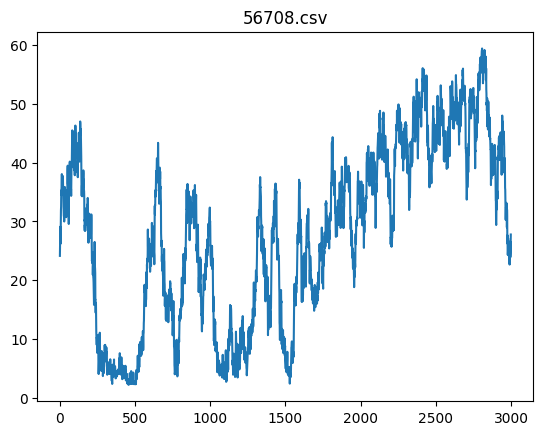

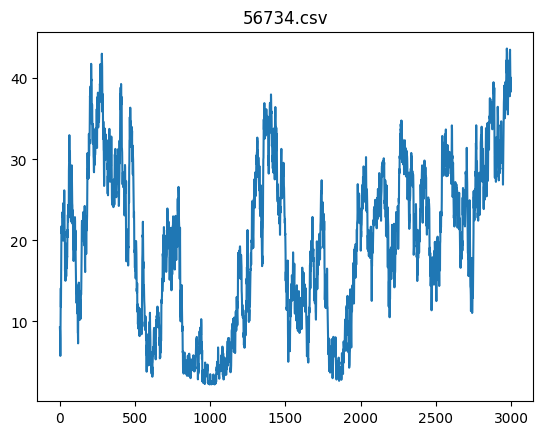

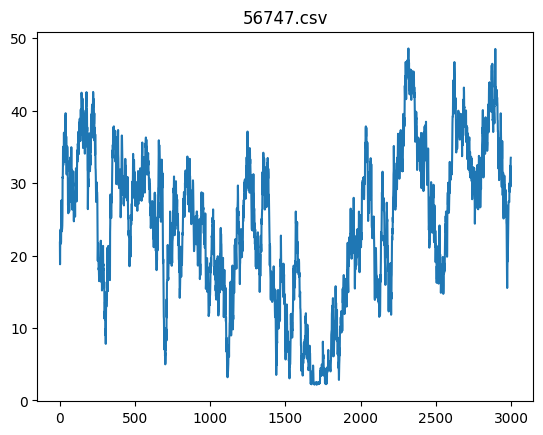

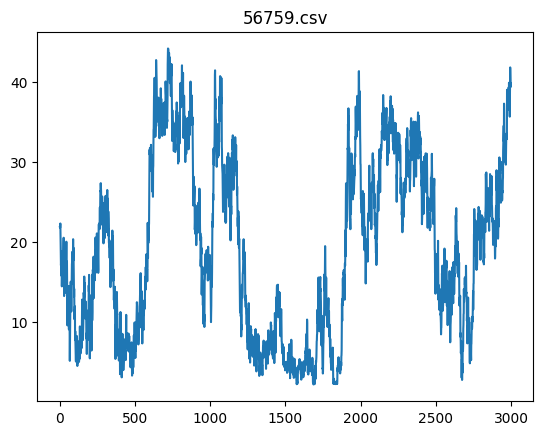

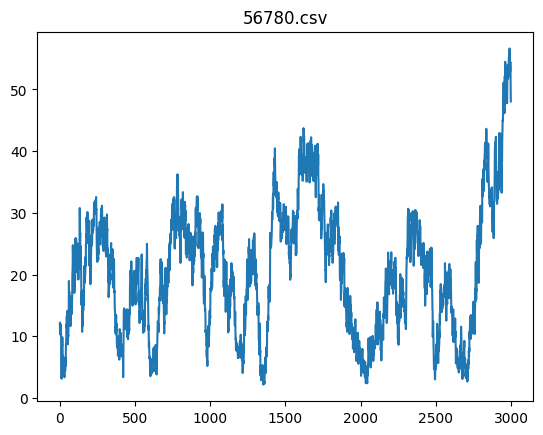

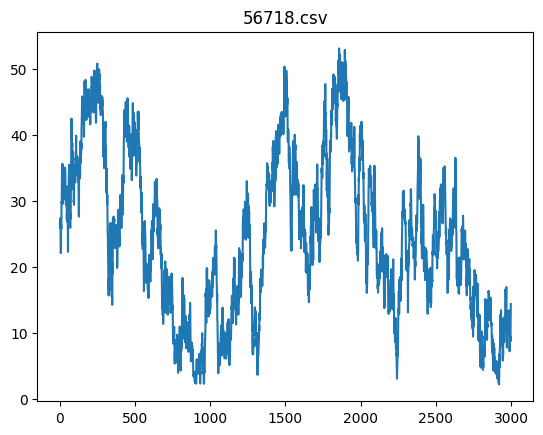

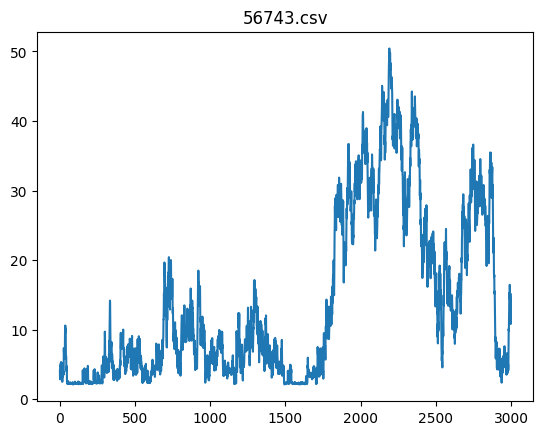

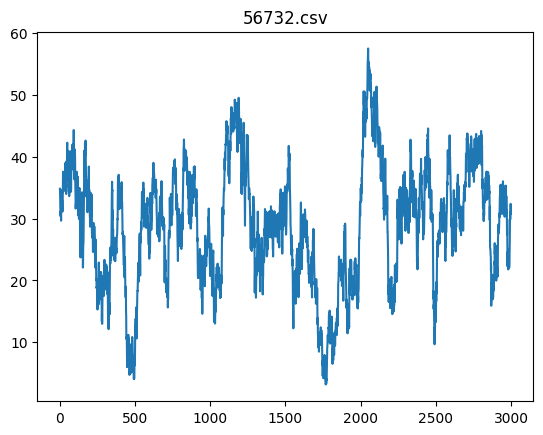

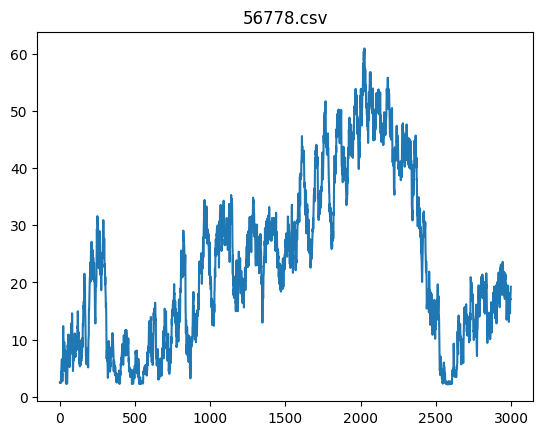

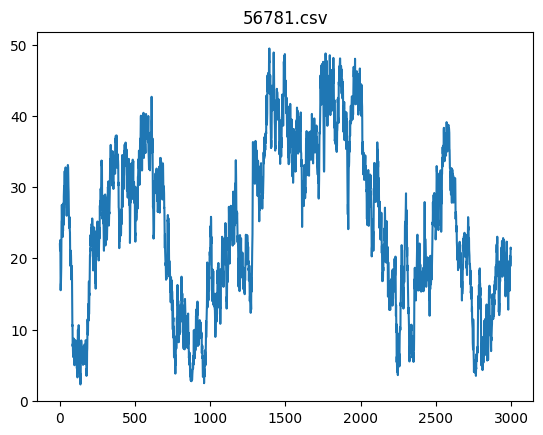

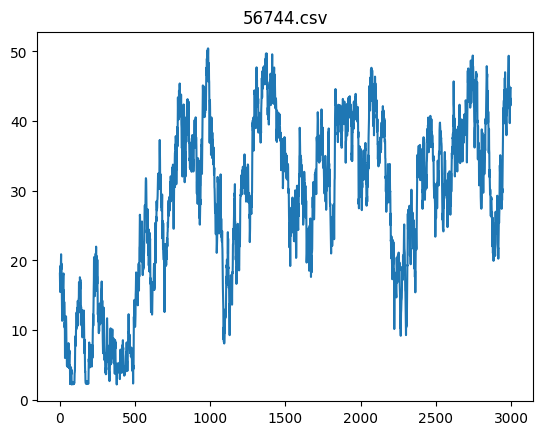

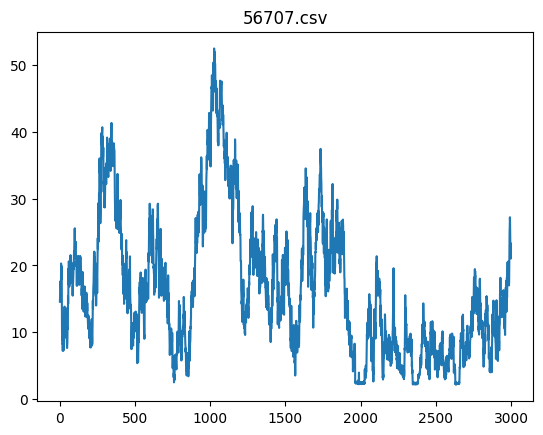

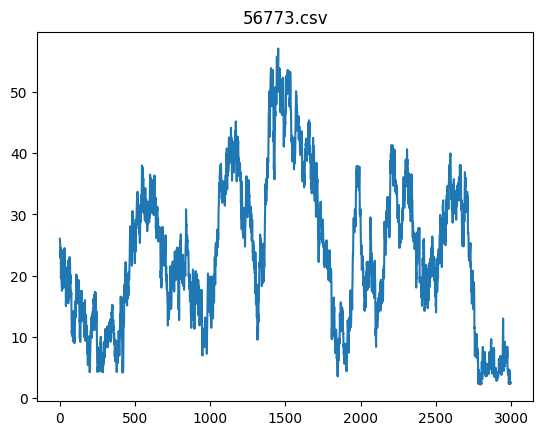

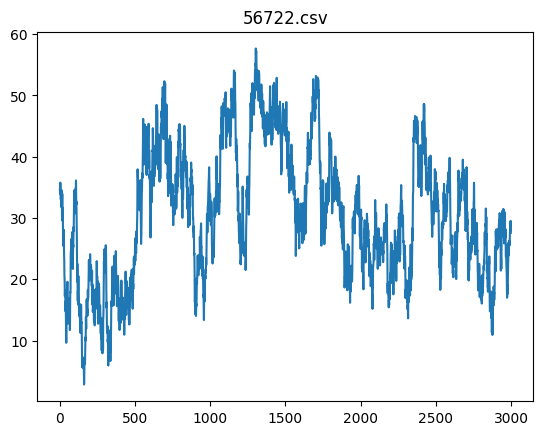

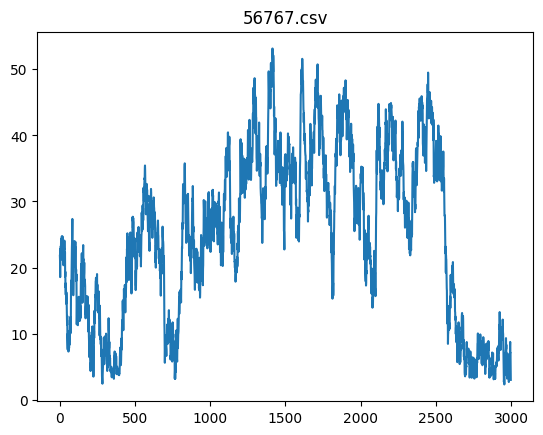

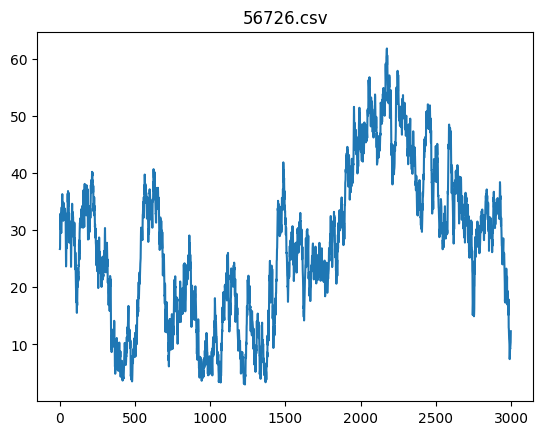

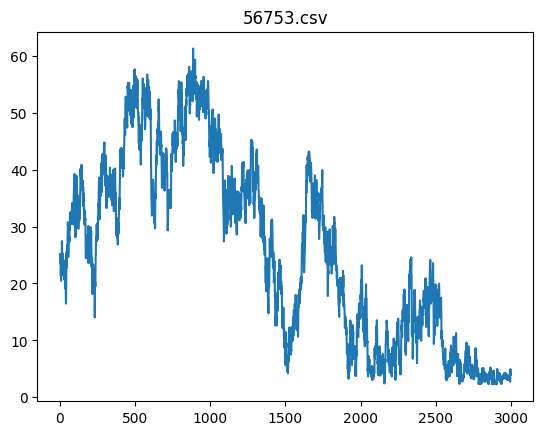

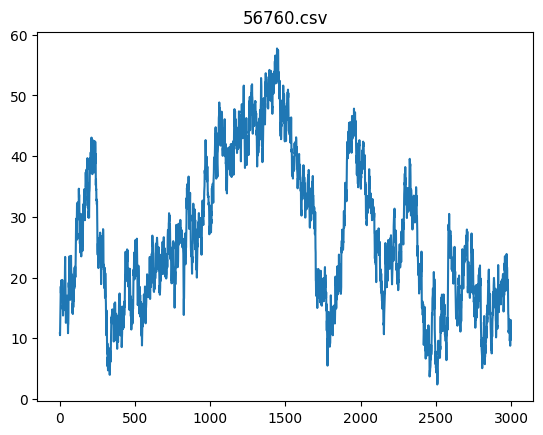

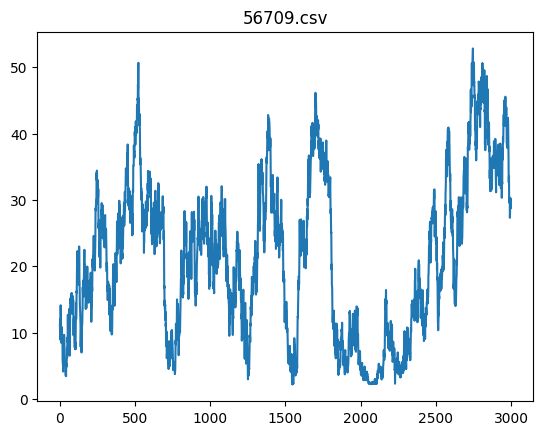

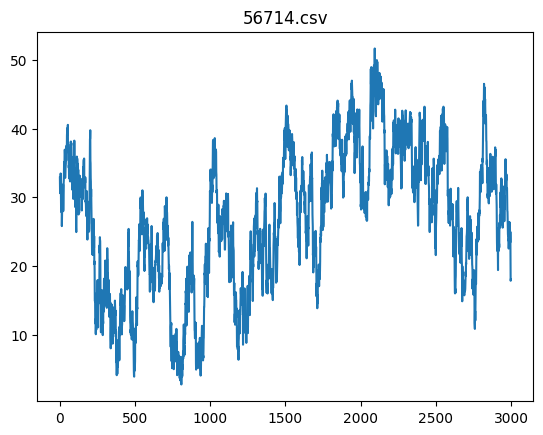

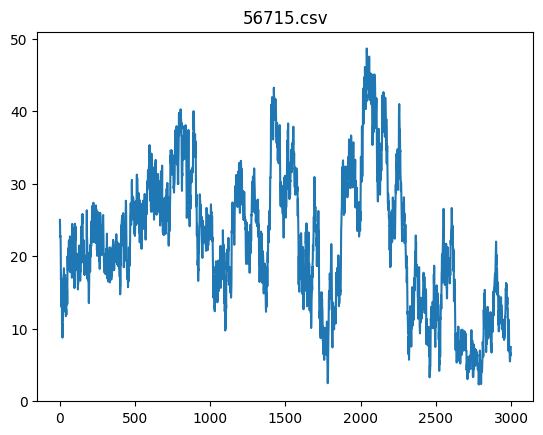

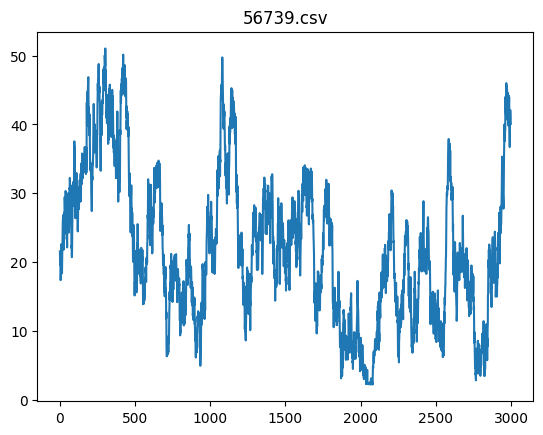

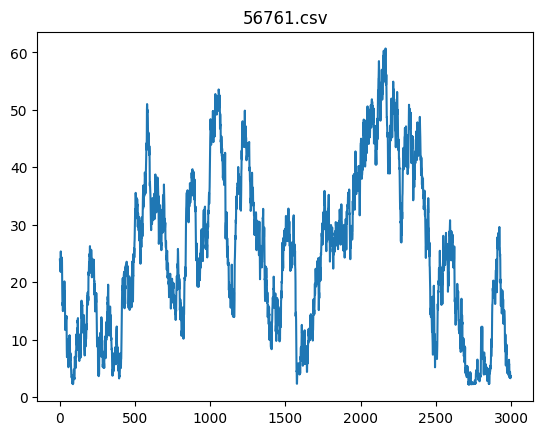

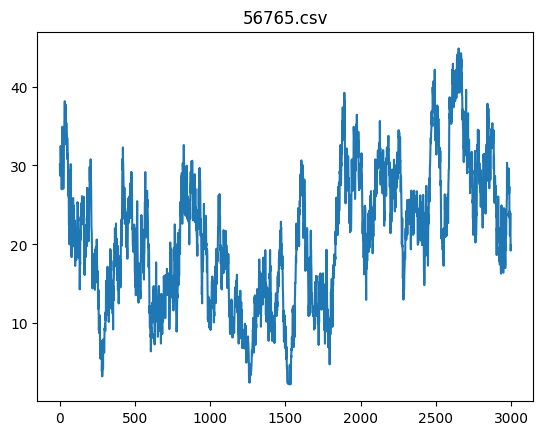

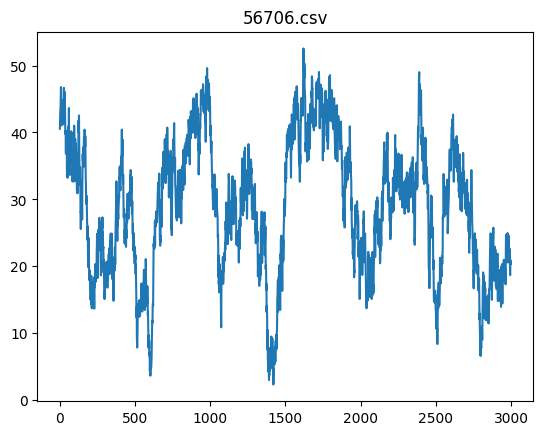

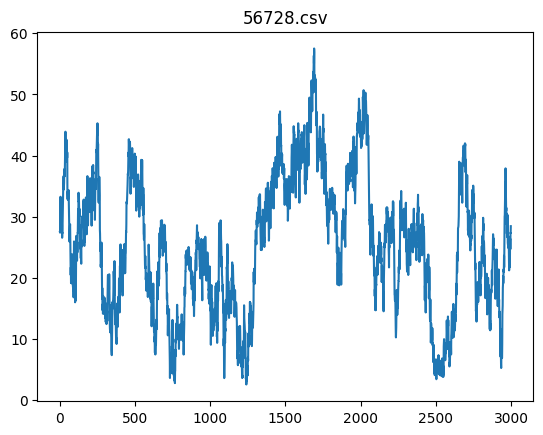

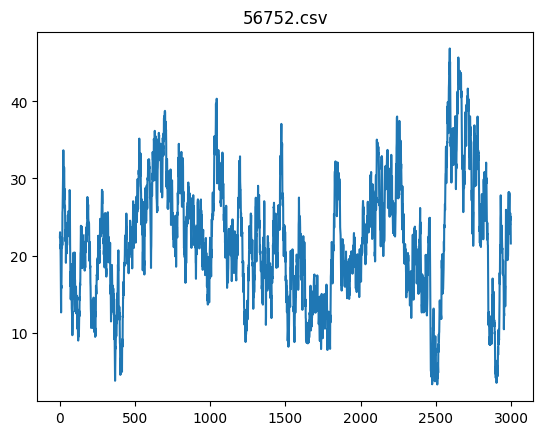

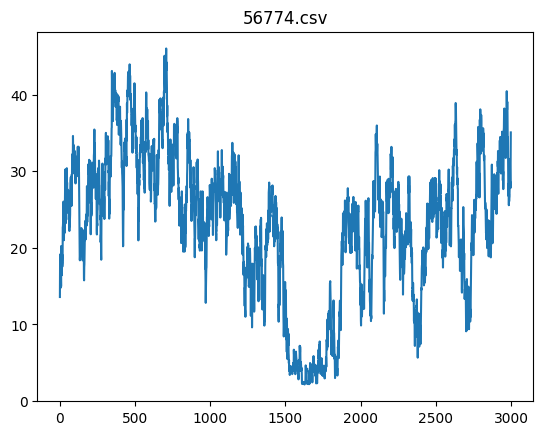

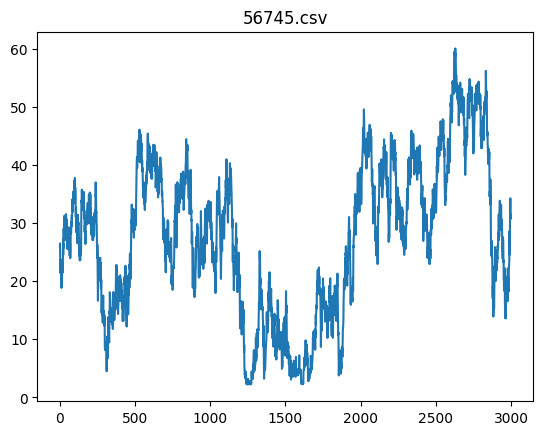

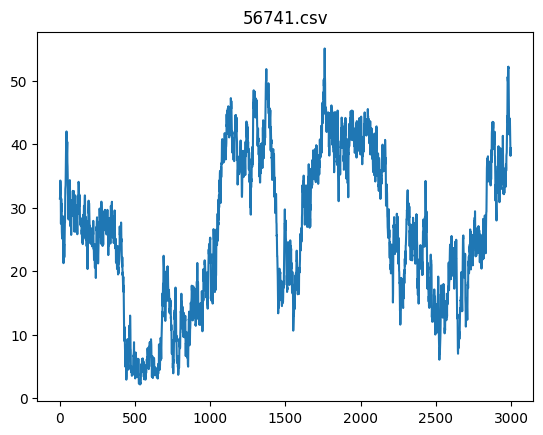

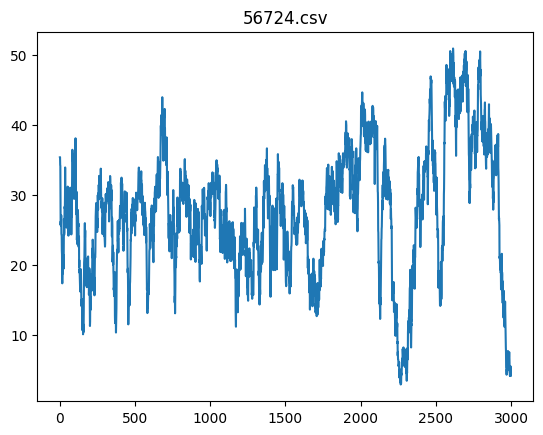

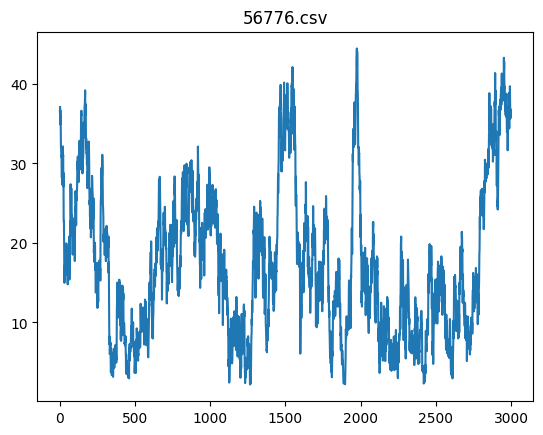

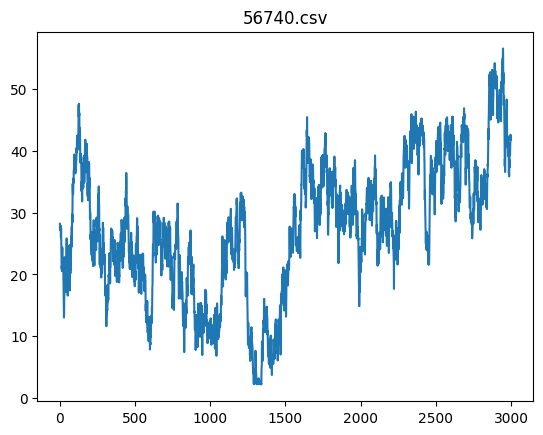

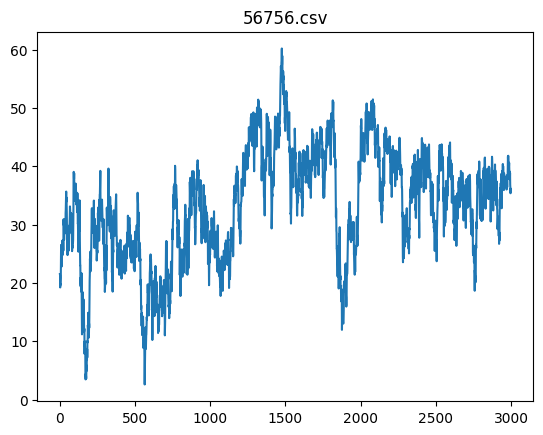

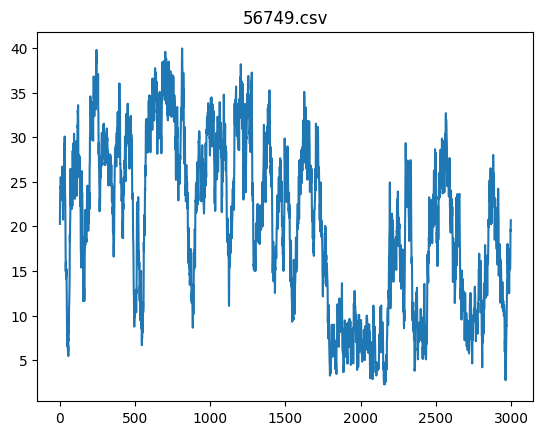

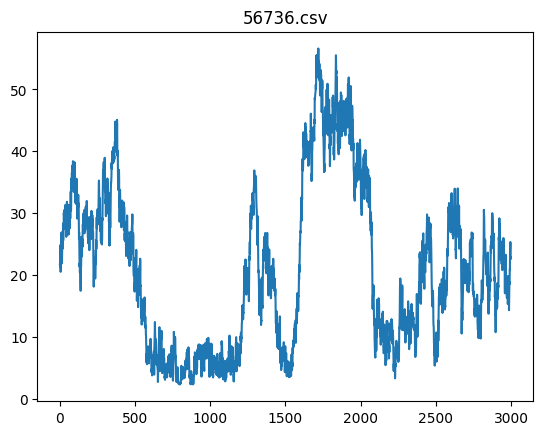

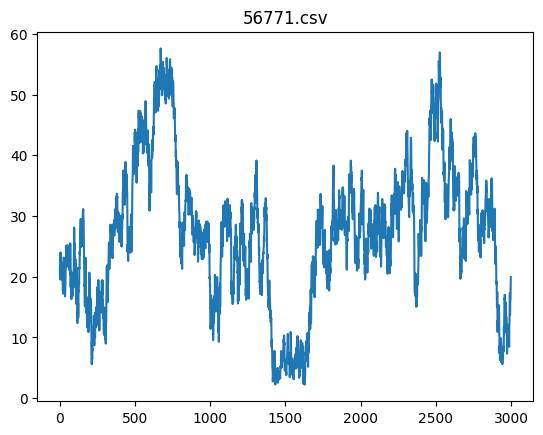

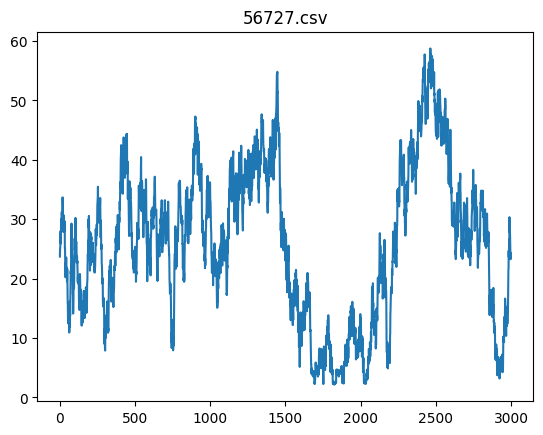

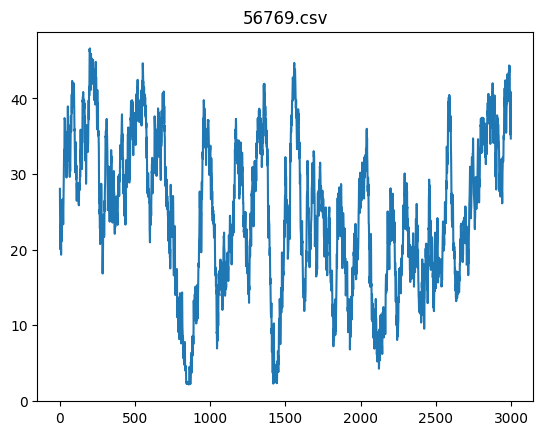

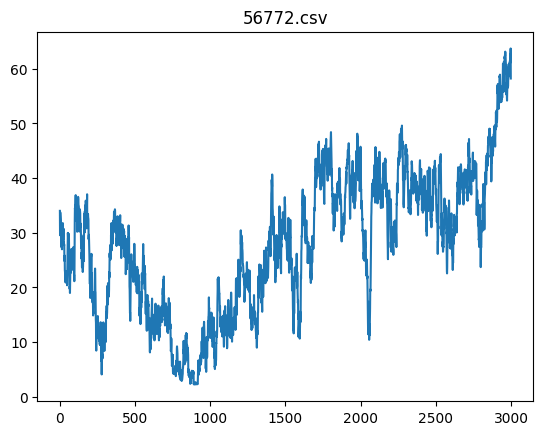

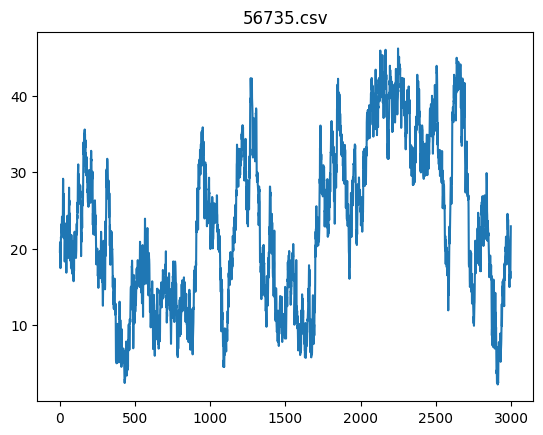

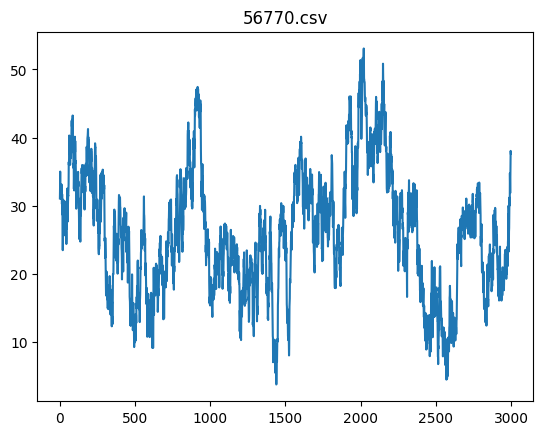

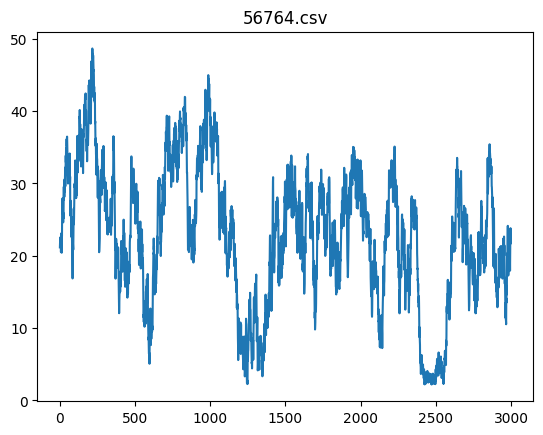

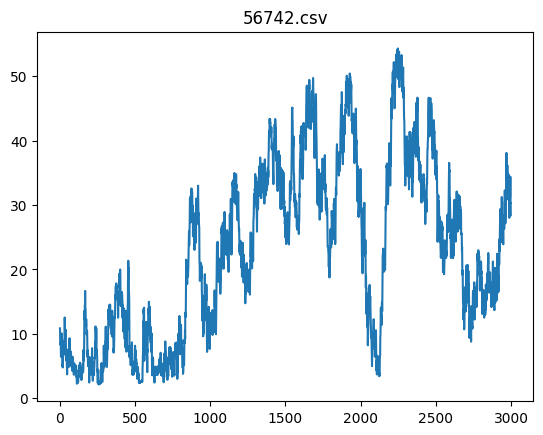

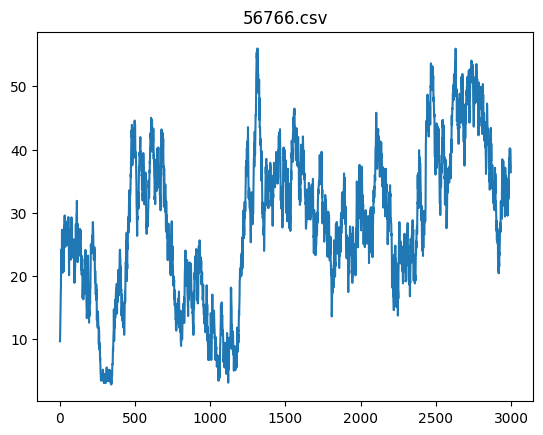

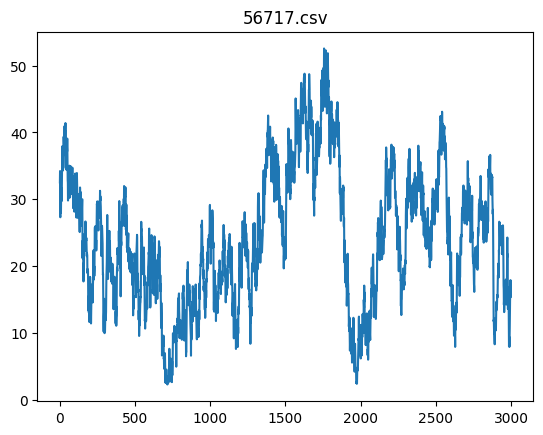

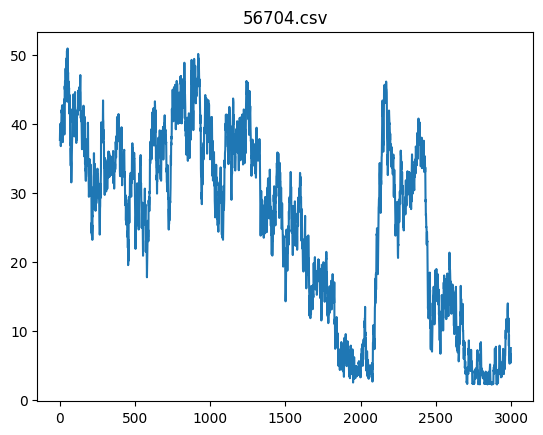

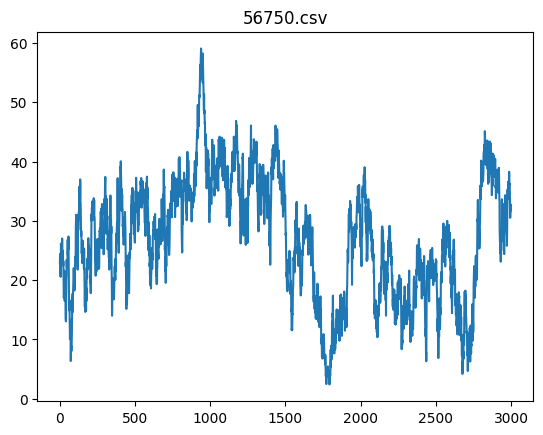

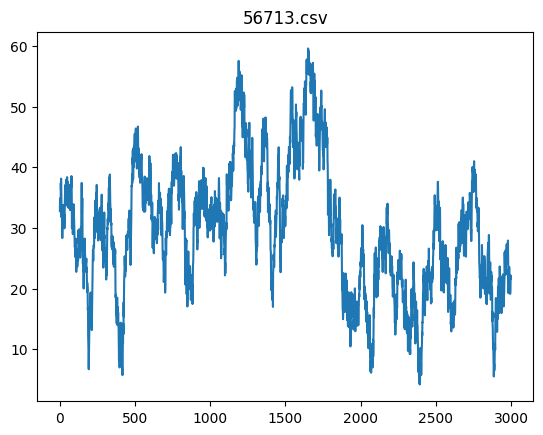

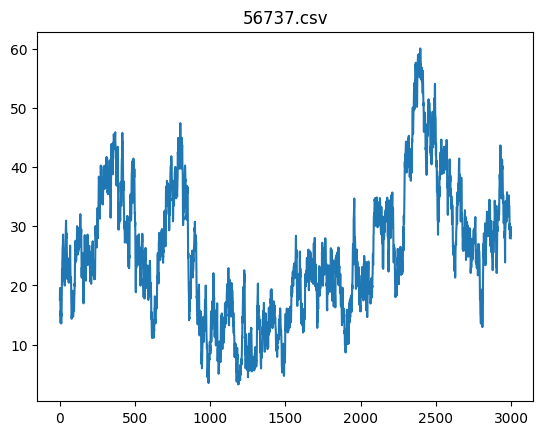

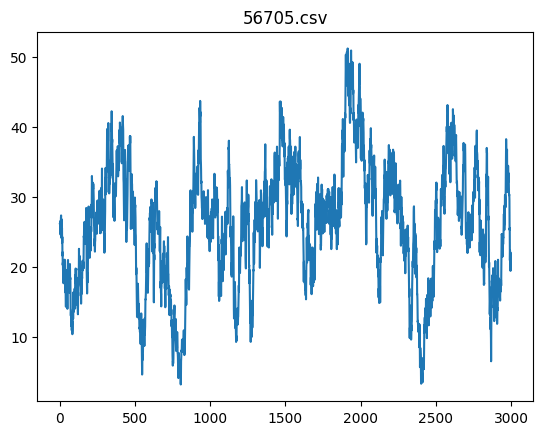

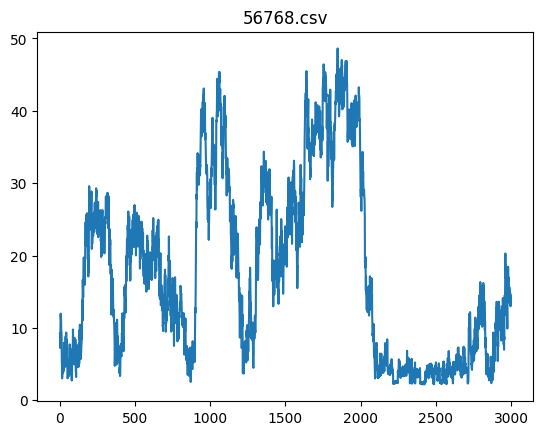

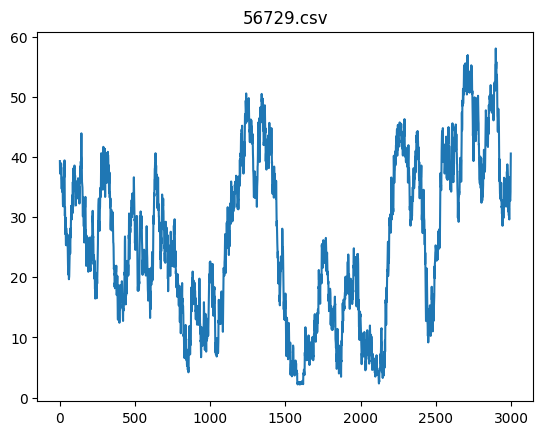

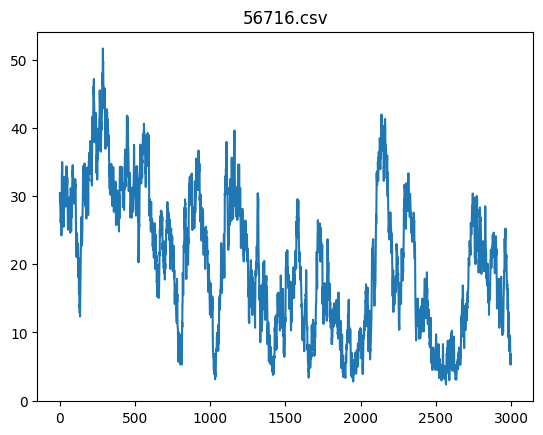

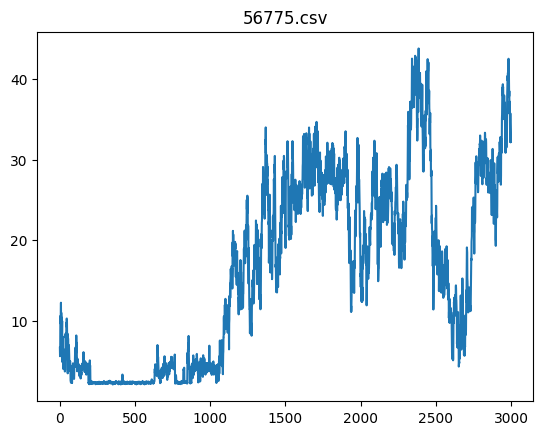

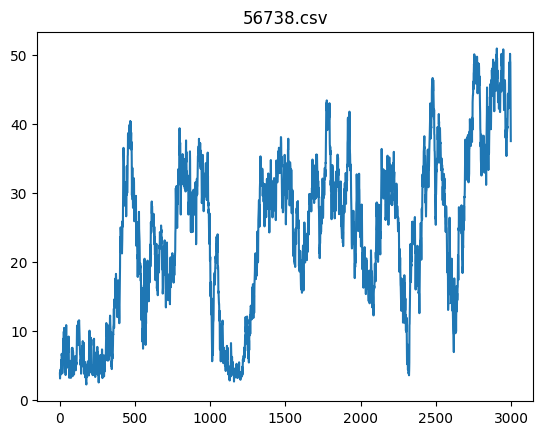

In [20]:
ca_dist_folder='/media/leandro/Volumen1TB1/Lean/SBG/Base_de_calcio/Estudio de la diversidad conformacional de sitios de unión a Calcio/MCU/na_distances/'
for file in os.listdir(ca_dist_folder):
# for file in [56542,56653,56665,56635]:
    plt.figure()
    plt.plot(pd.read_csv(ca_dist_folder + str(file))['distances'])
    plt.title(file)
    plt.show()

In [32]:
for i in [56542,56653,56665,56635]:
    df=pd.read_csv(ca_dist_folder + str(i) + '.csv')
    df_contact = df[df['distances']<5]
    pd.set_option('display.max_rows', None)
#     print(i,df_contact)
    print(i,df_contact.drop_duplicates(subset='res_position'))
    # list(df_contact['res_position'].drop_duplicates())

56542       Unnamed: 0 atom_name  distances res_name  res_position
1171        3833       OE1   4.967985      GLU         241.0
1245        3883       OE1   4.260575      GLU         244.0
1253        4329       HB2   4.656507      SER         272.0
1266        4337       HA1   4.461255      GLY         273.0
1498        2232       HG2   4.408638      PRO         140.0
1553        2258       OE1   4.298036      GLU         142.0
1554        2225         O   4.539752      GLU         139.0
2520        4213       HB1   4.440333      PRO         264.0
2522        4251       HA2   4.239287      GLY         267.0
2523        2271         O   4.472977      ALA         143.0
2533        2280       HG1   4.542285      GLU         144.0
2541        2246         O   4.235671      GLY         141.0
2881        4177       OD1   4.972613      ASP         262.0
2888        4202      HH22   4.913543      ARG         263.0
2963        3945        HG   4.961868      SER         248.0
56653       Unname

NameError: name 'dist_arr' is not defined

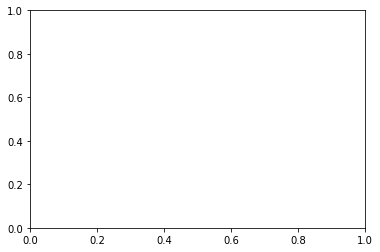

In [13]:
fig, ax = plt.subplots()
im = ax.imshow(dist_arr, origin='upper')

# add residue ID labels to axes
tick_interval = 5
ax.set_yticks(np.arange(n_LID)[::tick_interval])
ax.set_xticks(np.arange(n_NMP)[::tick_interval])
ax.set_yticklabels(LID_ca.resids[::tick_interval])
ax.set_xticklabels(NMP_ca.resids[::tick_interval])

# add figure labels and titles
plt.ylabel('LID')
plt.xlabel('NMP')
plt.title('Distance between alpha-carbon')

# colorbar
cbar = fig.colorbar(im)
cbar.ax.set_ylabel('Distance (Angstrom)')

### Contact analysis: number of contacts within a cutoff

In [ ]:
sel_basic = "(resname CA)"
sel_acidic = "(resname ASP GLU) and (name OE* OD*)"
acidic = u.select_atoms(sel_acidic)
basic = u.select_atoms(sel_basic)

In [ ]:
def contacts_within_cutoff(u, group_a, group_b, radius=4.5):
    timeseries = []
    for ts in u.trajectory:
        # calculate distances between group_a and group_b
        dist = contacts.distance_array(group_a.positions, group_b.positions)
        # determine which distances <= radius
        n_contacts = contacts.contact_matrix(dist, radius).sum()
        timeseries.append([ts.frame, n_contacts])
    return np.array(timeseries)

In [ ]:
dist = contacts.distance_array(acidic.positions, basic.positions)
# determine which distances <= radius
n_contacts = contacts.contact_matrix(dist, 4.5)

In [ ]:
ca = contacts_within_cutoff(u, acidic, basic, radius=4.5)
ca.shape

In [ ]:
ca_df = pd.DataFrame(ca, columns=['Frame',
                                  '# Contacts'])
ca_df.head()

In [ ]:
ca_df['# Contacts'][1000].sum()

In [ ]:
ca_df.plot(x='Frame')
plt.ylabel('# salt bridges')

### Calculating the pairwise RMSD of a trajectory

#### RMSD to itself

In [10]:
traj_0CA = mda.Universe(traj_path + '4nsc_A_0.15NA_30ns_gromacs/md.gro',traj_path + '4nsc_A_0.15NA_30ns_gromacs/md.xtc')
traj_3CA = mda.Universe(traj_path + '4nsc_A_0.15CA_30ns_gromacs/md.gro',traj_path + '4nsc_A_0.15CA_30ns_gromacs/md.xtc')

In [15]:
mobile = mda.Universe(traj_path + '4nsc_A_0.15CA_30ns_gromacs/md.gro', traj_path + '4nsc_A_0.15CA_30ns_gromacs/md.xtc')
ref = mda.Universe(traj_path + '4nsc_A_0.15CA_30ns_gromacs/md.gro', traj_path + '4nsc_A_0.15CA_30ns_gromacs/md.xtc')

mobile.trajectory[-1]  # set mobile trajectory to last frame
ref.trajectory[0]  # set reference trajectory to first frame

mobile_ca = mobile.select_atoms('name CA')
ref_ca = ref.select_atoms('name CA')
unaligned_rmsd = rms.rmsd(mobile_ca.positions, ref_ca.positions, superposition=False)
print(f"Unaligned RMSD: {unaligned_rmsd:.2f}")

Unaligned RMSD: 51.31


In [16]:
aligner = align.AlignTraj(mobile, ref, select='name CA', in_memory=True).run()

In [17]:
mobile.trajectory[-1]  # set mobile trajectory to last frame
ref.trajectory[0]  # set reference trajectory to first frame

mobile_ca = mobile.select_atoms('name CA')
ref_ca = ref.select_atoms('name CA')
aligned_rmsd = rms.rmsd(mobile_ca.positions, ref_ca.positions, superposition=False)

print(f"Aligned RMSD: {aligned_rmsd:.2f}")

Aligned RMSD: 46.43


In [18]:
matrix = diffusionmap.DistanceMatrix(mobile, select='name CA').run()

In [ ]:
matrix.results.dist_matrix.shape

In [19]:
a = matrix.results.dist_matrix
ind = np.unravel_index(np.argmax(a, axis=None), a.shape) 
print(matrix.results.dist_matrix.max(),ind)

49.52185244642253 (114, 2968)


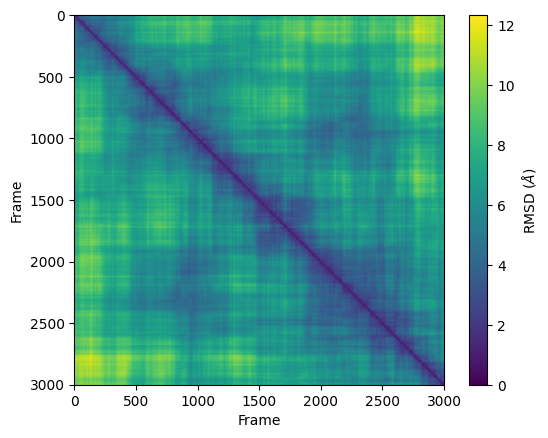

In [14]:
plt.imshow(matrix.results.dist_matrix, cmap='viridis')
plt.xlabel('Frame')
plt.ylabel('Frame')
plt.colorbar(label=r'RMSD ($\AA$)')

#### RMSD two trajectories 

In [15]:
prmsd = np.zeros((len(traj_0CA.trajectory),  # y-axis
                  len(traj_3CA.trajectory)))  # x-axis

In [16]:
for i, frame_open in enumerate(traj_3CA.trajectory):
    r = rms.RMSD(traj_0CA, traj_3CA, select='name C',
                 ref_frame=i).run()
    prmsd[i] = r.results.rmsd[:, -1]  # select 3rd column with RMSD values

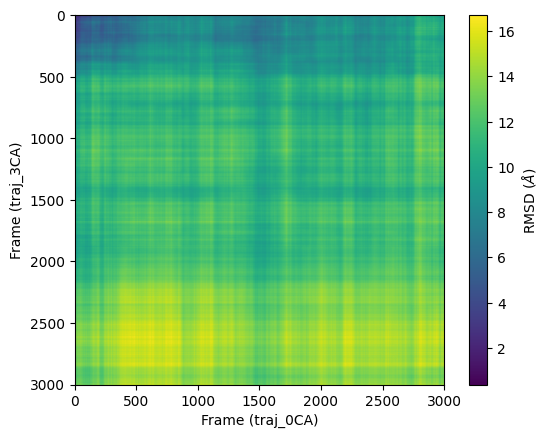

In [17]:
plt.imshow(prmsd, cmap='viridis')
plt.xlabel('Frame (traj_0CA)')
plt.ylabel('Frame (traj_3CA)')
plt.colorbar(label=r'RMSD ($\AA$)')

### Calculating RMSF

In [18]:
c_alphas = traj_0CA.select_atoms('protein and name CA')
R = rms.RMSF(c_alphas).run()
c2_alphas = traj_3CA.select_atoms('protein and name CA')
R2 = rms.RMSF(c2_alphas).run()

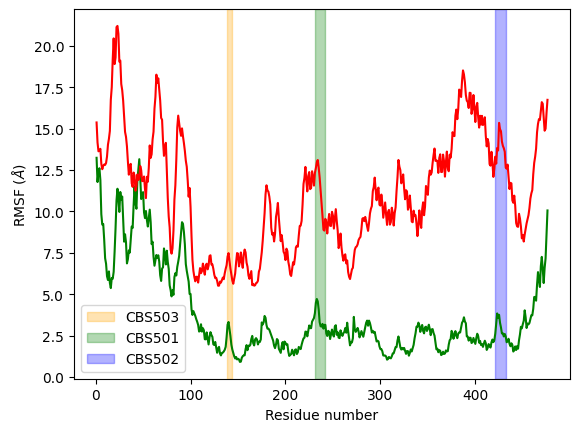

In [19]:
plt.plot(c_alphas.resids, R.results.rmsf, 'g')
plt.plot(c2_alphas.resids, R2.results.rmsf, 'r')

plt.xlabel('Residue number')
plt.ylabel('RMSF ($\AA$)')
plt.axvspan(138, 144,zorder=0, alpha=0.3, color='orange', label='CBS503')
plt.axvspan(231, 242, zorder=0, alpha=0.3, color='green', label='CBS501')
plt.axvspan(421, 432, zorder=0, alpha=0.3, color='blue', label='CBS502')
plt.legend()

### Read energy data

In [ ]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt

# Ruta al archivo ener.edr
ener_file = '/home/lean/Documentos/Lean/SBG/Base_de_calcio/DiversidadConformacionalCBS/MCU/molecular dynamic/4nsd_A_3CA_gromacs/md_0_1.edr'

# Crear el objeto Energy
ener = mda.auxiliary.EDR.EDRReader(ener_file)

print(ener.terms)
# Obtener las energías de la simulación
some_terms = ener.get_data(["Potential", "Kinetic En.", "Box-X","Coul-SR:Protein-CA"])
plt.plot(some_terms["Time"], some_terms["Coul-SR:Protein-CA"])

### Trajectory to pdb

In [3]:
path = '/home/lean/Documentos/Lean/SBG/Base_de_calcio/DiversidadConformacionalCBS/MCU/molecular dynamic/'
pdb = mda.coordinates.PDB.PDBWriter(path + "4nsc_A_0.15NA_30ns_frames.pdb", u, start=1, step=1000)
pdb.write_all_timesteps(u)

/home/lean/anaconda3/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:1176: UserWarning: Found missing chainIDs. Corresponding atoms will use value of 'X'
  warnings.warn("Found missing chainIDs."


### RMSF of PDB

In [ ]:
import MDAnalysis as mda
import numpy as np
import os
import matplotlib.pyplot as plt

path = '/home/lean/Documentos/Lean/Andrea/'
# Cargar las dos estructuras PDB
for andrea_ac in os.listdir(path + '7.5_model/'):
    if '5o04' in andrea_ac:
        print(andrea_ac)
        u1 = mda.Universe(path + '7.5_model/' + andrea_ac)
        for hassman_ac in os.listdir(path + 'nano85/'):
            if '5o04' in hassman_ac:
                print(hassman_ac)
                u2 = mda.Universe(path + 'nano85/' + hassman_ac)
                
                # Seleccionar el grupo de átomos de interés (ajusta según tu sistema)
                seleccion = u1.select_atoms("protein and name CA")

                # Obtener las coordenadas de ambas estructuras
                coord1 = u1.select_atoms("protein and name CA").positions[:117]
                coord2 = u2.select_atoms("protein and name CA").positions[:117]

                # Calcular la diferencia RMSF
                rmsf_diff = np.sqrt(np.mean(np.square(coord1 - coord2), axis=1))

                # Graficar la diferencia RMSF
                plt.plot(seleccion.residues.resids[:117], rmsf_diff, label='Diferencia RMSF')
                plt.xlabel('Residuo')
                plt.ylabel('Diferencia RMSF (Å)')
                plt.legend()
                plt.show()

In [ ]:
import MDAnalysis as mda
import numpy as np
import os
import matplotlib.pyplot as plt

path = '/home/lean/Documentos/Lean/glucogenosis/G6P/'
# Cargar las dos estructuras PDB
for andrea_ac in os.listdir(path):
    if 'G6Phuman-WTmodel' in andrea_ac:
        print(andrea_ac)
        u1 = mda.Universe(path + andrea_ac)
        for hassman_ac in os.listdir(path):
            if 'G6Phuman-T16Rmodel' in hassman_ac:
                print(hassman_ac)
                u2 = mda.Universe(path + hassman_ac)
                
                # Seleccionar el grupo de átomos de interés (ajusta según tu sistema)
                seleccion = u1.select_atoms("protein and name CA")

                # Obtener las coordenadas de ambas estructuras
                coord1 = u1.select_atoms("protein and name CA").positions[:117]
                coord2 = u2.select_atoms("protein and name CA").positions[:117]

                # Calcular la diferencia RMSF
                rmsf_diff = np.sqrt(np.mean(np.square(coord1 - coord2), axis=1))

                # Graficar la diferencia RMSF
                plt.plot(seleccion.residues.resids[:117], rmsf_diff, label='Diferencia RMSF')
                plt.xlabel('Residuo')
                plt.ylabel('Diferencia RMSF (Å)')
                plt.legend()
                plt.show()

In [ ]:
rmsf_diff[15]